# IDEA
### The average trip duration of the customer is more than that of the subscriber which indicates that a single time user tries to make the best use of his investment.

# Null Hypothesis ($H_0$)
### The mean trip duration of single time user (customer) over a week is less than or equal to the mean trip duration of the subscribers over a week.

### $H_0$ : T(customer) <= T(subscriber)

# Alternate Hypothesis ($H_a$)

### The mean trip duration of single time user (customer) over a week in more than the mean trip duration of the subscribers over a week

### $H_a$: T(customer) > T(subscriber)

### I will use significance level α = 0.05

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                    os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [4]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
df['date'] = pd.to_datetime(df['starttime'])
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [6]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [7]:
df.head()

,tripduration,usertype,date
0,1346,Subscriber,2015-01-01 00:01:00
1,363,Subscriber,2015-01-01 00:02:00
2,346,Subscriber,2015-01-01 00:04:00
3,182,Subscriber,2015-01-01 00:04:00
4,969,Subscriber,2015-01-01 00:05:00


In [8]:
fig=pl.figure(figsize(5,5))
p = df.groupby(['usertype']).mean()

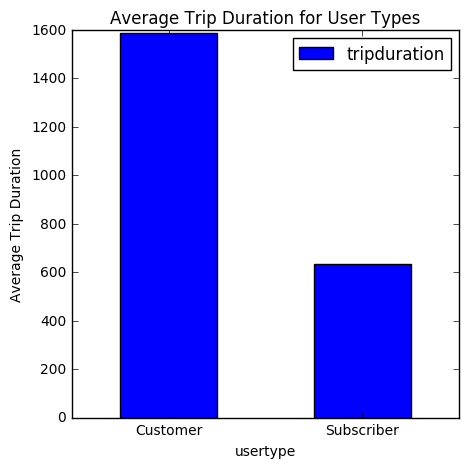

In [9]:
p.plot(kind='bar',rot=360)
pl.ylabel('Average Trip Duration')
pl.title('Average Trip Duration for User Types')

### Figure 1: Average Trip Duration per User Type

In [ ]:
sub = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()

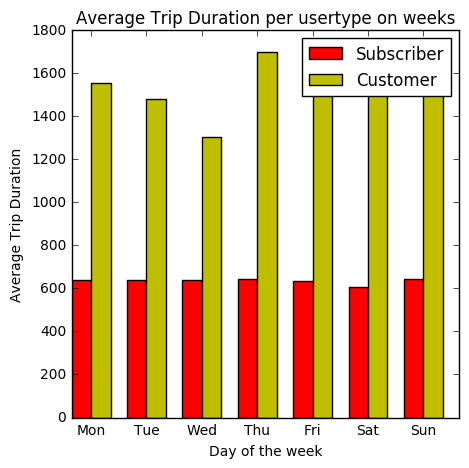

In [11]:
#fig=pl.figure(figsize(8,8))

fig, ax = pl.subplots()

#pl.xlim(0,3000)
width = 0.35  
rects1 = ax.bar( sub.index.values , sub.tripduration, width, color='r')

rects2 = ax.bar(cus.index.values + width, cus.tripduration, width, color='y')



# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weeks')
ax.set_xticks(cus.index.values + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)

ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))

### Figure 2: The average trip Duration for the user types over a week 